In [ ]:
Лабораторна робота №12. Об’єктно-орієнтоване програмування. Частина ІІ

In [ ]:
Мета: навчитися програмувати в стилі об’єектно-орієнтованого програмування.

In [ ]:
Основи об’єктно-орієнтованого програмування на Python. Метод str()

In [ ]:
Приклад 1

In [ ]:
class Timer:
    def __init__(self, hours=0, minutes=0, seconds=0):
        self.__hours = hours
        self.__minutes = minutes
        self.__seconds = seconds

    def __str__(self):
        return f"{self.__hours:02}:{self.__minutes:02}:{self.__seconds:02}"

    def next_second(self):
        self.__seconds += 1
        if self.__seconds == 60:
            self.__seconds = 0
            self.__minutes += 1
        if self.__minutes == 60:
            self.__minutes = 0
            self.__hours += 1
        if self.__hours == 24:
            self.__hours = 0

    def previous_second(self):
        self.__seconds -= 1
        if self.__seconds == -1:
            self.__seconds = 59
            self.__minutes -= 1
        if self.__minutes == -1:
            self.__minutes = 59
            self.__hours -= 1
        if self.__hours == -1:
            self.__hours = 23

# Тестування
timer = Timer(23, 59, 59)
print(timer)  # 23:59:59
timer.next_second()
print(timer)  # 00:00:00
timer.previous_second()
print(timer)  # 23:59:59


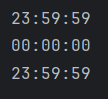

In [ ]:
Приклад 2
Ваше завдання – реалізувати клас під назвою Weeker. Так, Ваші очі не обманюють Вас – ця назва походить від того факту, що об’єкти цього класу можуть зберігати та керувати днями тижня.

In [ ]:
class WeekDayError(Exception):
    pass

class Weeker:
    valid_days = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
    
    def __init__(self, day):
        if day not in Weeker.valid_days:
            raise WeekDayError("Sorry, I can't serve your request.")
        self.__day = day
    
    def __str__(self):
        return self.__day
    
    def add_days(self, n):
        index = Weeker.valid_days.index(self.__day)
        new_index = (index + n) % 7
        self.__day = Weeker.valid_days[new_index]
    
    def subtract_days(self, n):
        index = Weeker.valid_days.index(self.__day)
        new_index = (index - n) % 7
        self.__day = Weeker.valid_days[new_index]

# Тестування
weeker = Weeker("Mon")
print(weeker)  # Mon
weeker.add_days(3)
print(weeker)  # Thu
weeker.subtract_days(5)
print(weeker)  # Sun
try:
    invalid_weeker = Weeker("Funday")
except WeekDayError as e:
    print(e)  # Sorry, I can't serve your request.


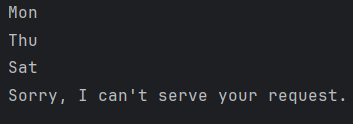

In [ ]:
Приклад 3
Давайте відвідаємо зовсім особливе місце – площину з декартовою системою координат (Ви можете дізнатися більше про цю концепцію тут: Декартова система координат).

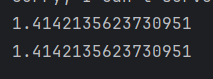

In [ ]:
Завдання 1
Тепер ми збираємося вбудувати клас Point (див. попереднє завдання) в інший клас. Крім того, ми збираємося помістити три точки в один клас, що дозволить нам визначити трикутник. Як ми можемо це зробити?

In [ ]:
import math

class Point:
    def __init__(self, x=0.0, y=0.0):
        self.__x = x
        self.__y = y
    
    def getx(self):
        return self.__x
    
    def gety(self):
        return self.__y
    
    def distance_from_point(self, point):
        return math.hypot(self.__x - point.getx(), self.__y - point.gety())

class Triangle:
    def __init__(self, p1, p2, p3):
        self.__points = [p1, p2, p3]
    
    def perimeter(self):
        side1 = self.__points[0].distance_from_point(self.__points[1])
        side2 = self.__points[1].distance_from_point(self.__points[2])
        side3 = self.__points[2].distance_from_point(self.__points[0])
        return side1 + side2 + side3

# Тестування
point1 = Point(0, 0)
point2 = Point(1, 0)
point3 = Point(0, 1)
triangle = Triangle(point1, point2, point3)
print(triangle.perimeter())  # 3.414213562373095


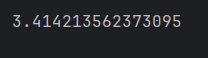

In [ ]:
Контрольні запитання
Припустимо, що наступний фрагмент коду успішно виконано:

class Dog: 
    kennel = 0 
    def __init__(self, breed): 
        self.breed = breed 
        Dog.kennel += 1 

    def __str__(self): 
        return self.breed + " says: Woof!" 


class SheepDog(Dog): 
    def __str__(self): 
        return super().__str__() + " Don't run away, Little Lamb!" 


class GuardDog(Dog): 
     def __str__(self): 
         return super().__str__() + " Stay where you are, Mister Intruder!" 

rocky = SheepDog("Collie") 
luna = GuardDog("Dobermann") 
Відповідь: 
Collie says: Woof! Don't run away, Little Lamb!
Dobermann says: Woof! Stay where you are, Mister Intruder!
Який очікуваний вивід наступного фрагмента коду?
print(rocky) print(luna)

Який очікуваний вивід наступного фрагмента коду?
print(issubclass(SheepDog, Dog), issubclass(SheepDog, GuardDog))
print(isinstance(rocky, GuardDog), isinstance(luna, GuardDog))
True False
False True